In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [60]:
df = pd.read_csv('cybersecurity_attacks.csv')
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [61]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [62]:
df.shape

(40000, 25)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# DATA CLEANING

In [64]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [65]:
columns_to_drop = ['Malware Indicators', 'Alerts/Warnings', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts']
df = df.drop(columns_to_drop, axis=1)

In [66]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Anomaly Scores            0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Log Source                0
dtype: int64

In [67]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Source Port,40000.0,32970.356450,18560.425604,1027.0,16850.75,32856.000,48928.25,65530.0
Destination Port,40000.0,33150.868650,18574.668842,1024.0,17094.75,33004.500,49287.00,65535.0
Packet Length,40000.0,781.452725,416.044192,64.0,420.00,782.000,1143.00,1500.0
Anomaly Scores,40000.0,50.113473,28.853598,0.0,25.15,50.345,75.03,100.0


In [68]:
df.duplicated().sum()

0

In [69]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Anomaly Scores',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'User Information', 'Device Information', 'Network Segment',
       'Geo-location Data', 'Log Source'],
      dtype='object')

# EDA

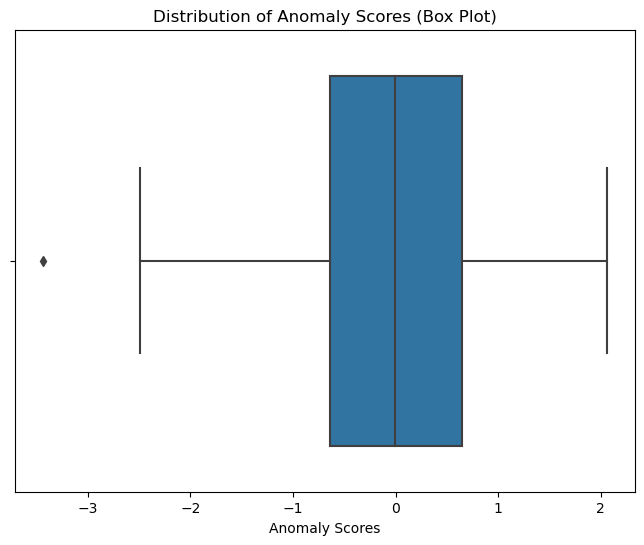

In [70]:
anomaly_scores = np.random.normal(size=100)

plt.figure(figsize=(8, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Distribution of Anomaly Scores (Box Plot)')
plt.xlabel('Anomaly Scores')
plt.show()

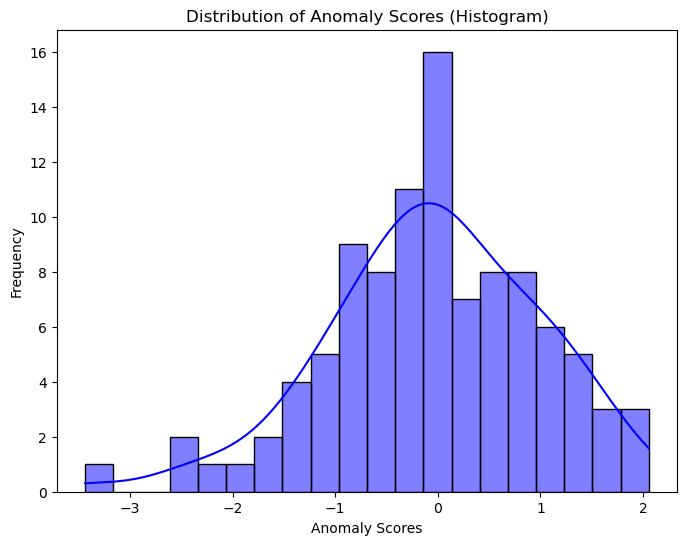

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(anomaly_scores, kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores (Histogram)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()

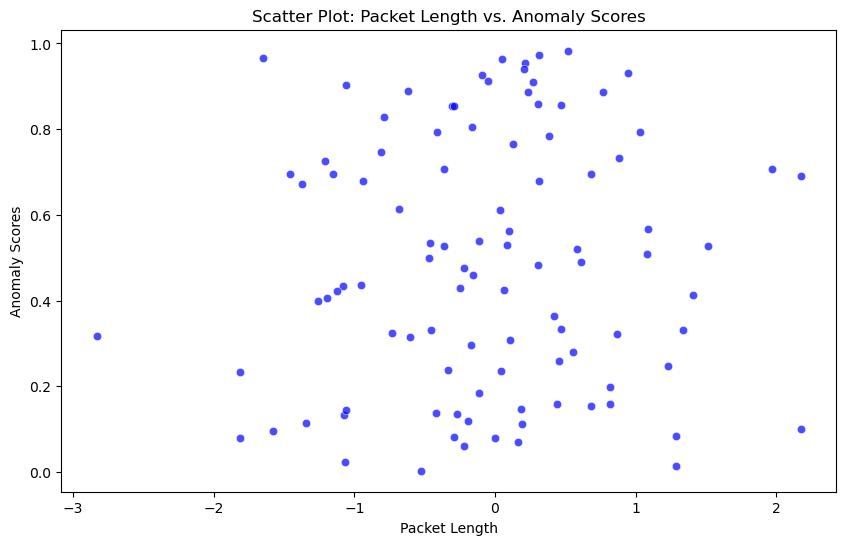

In [72]:
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()

# **ML work**

In [73]:
target_column = 'Attack Type'

X = df.drop(target_column, axis=1)
y = df[target_column]

In [74]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [75]:
X['Timestamp'] = pd.to_datetime(X['Timestamp'])

X['Hour'] = X['Timestamp'].dt.hour
X['Minute'] = X['Timestamp'].dt.minute
X['Second'] = X['Timestamp'].dt.second
X['Day'] = X['Timestamp'].dt.day
X['Month'] = X['Timestamp'].dt.month
X['Year'] = X['Timestamp'].dt.year

X = X.drop('Timestamp', axis=1)

In [76]:
label_encoder = LabelEncoder()
categorical_columns = ['Source IP Address', 'Destination IP Address', 'Protocol', 'Packet Type', 'Traffic Type', 'Payload Data', 'Anomaly Scores', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data', 'Log Source']
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Gradient Boost', GradientBoostingClassifier())
]

In [79]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} Accuracy: {accuracy}')

Decision Tree Accuracy: 0.337125
Random Forest Accuracy: 0.33725
Support Vector Machine Accuracy: 0.32975
Gradient Boost Accuracy: 0.336


# Testing

In [80]:
y = df['Source IP Address']
y

0         103.216.15.12
1        78.199.217.198
2          63.79.210.48
3         163.42.196.10
4         71.166.185.76
              ...      
39995      26.36.109.26
39996      17.21.163.81
39997     162.35.217.57
39998    208.72.233.205
39999     14.102.21.108
Name: Source IP Address, Length: 40000, dtype: object

In [81]:
X = df.drop('Source IP Address', axis=1)
X

,Timestamp,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Anomaly Scores,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Log Source
0,2023-05-30 06:33:58,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,28.67,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",Server
1,2020-08-26 07:08:30,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,51.50,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",Firewall
2,2022-11-13 08:23:25,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,87.42,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",Firewall
3,2023-07-02 10:38:46,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,15.79,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",Firewall
4,2023-07-16 13:11:07,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,0.52,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,39.28,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",Firewall
39996,2023-03-27 00:38:27,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,27.25,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",Firewall
39997,2022-03-31 01:45:49,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,31.01,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",Server
39998,2023-09-22 18:32:38,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,97.85,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",Server


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [83]:
lr  = LinearRegression()
lr.fit(X_train, y_train)

ValueError: could not convert string to float: '2022-12-31 19:46:29'